In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
dataset_file = 'dataset.csv'
df = pd.read_csv(dataset_file, index_col=0)
df.head()

,EB1rmsenergy10ms mean 1,EB1rmsenergy10ms sd 1,EB3intensity mean 1,EB3intensity sd 1,EL1totalloudness mean 1,EL1totalloudness sd 1,HL1firsttristimulus mean 1,HL1firsttristimulus sd 1,HL2secondtristimulus mean 1,HL2secondtristimulus sd 1,...,TL2variance sd 1,TL3nonzerocount mean 1,TL3nonzerocount sd 1,TL4lowestvalue mean 1,TL4lowestvalue sd 1,TL5highestvalue mean 1,TL5highestvalue sd 1,TL6averagedeviation mean 1,TL6averagedeviation sd 1,mood metadata
100-club_anw1131_001.mp3,0.240140,0.060702,728.928,252.644,0.755427,0.129525,0.693388,0.216468,0.110481,0.111591,...,13145300,14.67830,13.1406,0.054871,0.020054,0.712033,0.246817,2833.03,1340.11,Bright
1000-daggers_anw1369_008.mp3,0.105963,0.055528,320.105,158.405,0.772353,0.092986,0.688717,0.233605,0.108136,0.129063,...,11085900,13.08280,10.7179,0.025222,0.017246,0.312729,0.154776,3663.17,1258.92,Driving
18-forever_anw1345_002.mp3,0.176853,0.090519,784.077,354.278,0.778773,0.131538,0.633216,0.244079,0.197348,0.167304,...,12105200,8.96436,13.1811,0.039578,0.030691,0.766027,0.346173,5074.35,1187.75,Frantic
3-in-1-tribalism_anw1992_004.mp3,0.141666,0.069601,372.860,219.924,0.683732,0.175177,0.699034,0.251840,0.134497,0.157578,...,8154260,12.19650,11.1964,0.037016,0.022369,0.364177,0.214875,2313.27,1214.24,Power
a-beautiful-ending_anw2771_003.mp3,0.113067,0.068926,240.435,140.383,0.558260,0.113480,0.658452,0.275075,0.132034,0.182691,...,36823400,13.48280,12.6010,0.028043,0.019774,0.234765,0.137180,2207.44,2752.70,Peaceful


In [3]:
labels = df['mood metadata']
labels = labels.apply(lambda x: x.strip())
labels.head()

100-club_anw1131_001.mp3                Bright
1000-daggers_anw1369_008.mp3           Driving
18-forever_anw1345_002.mp3             Frantic
3-in-1-tribalism_anw1992_004.mp3         Power
a-beautiful-ending_anw2771_003.mp3    Peaceful
Name: mood metadata, dtype: object

In [4]:
features_df = df[df.columns.difference(['mood metadata'])]

In [5]:
X = features_df.as_matrix()

/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
le = preprocessing.LabelEncoder()
le.fit(labels)
Y = le.transform(labels)

In [7]:
X

array([[ 4.78741e-02,  2.40140e-01,  6.07025e-02, ...,  2.46817e-01,
         2.83303e+03,  1.34011e+03],
       [-1.09887e-02,  1.05963e-01,  5.55278e-02, ...,  1.54776e-01,
         3.66317e+03,  1.25892e+03],
       [ 8.27871e-02,  1.76853e-01,  9.05193e-02, ...,  3.46173e-01,
         5.07435e+03,  1.18775e+03],
       ...,
       [-1.29742e-01,  6.97167e-02,  4.79892e-02, ...,  1.58649e-01,
         3.58837e+03,  1.96510e+03],
       [-2.89274e-01,  1.24216e-01,  6.52597e-02, ...,  9.82264e-02,
         9.00845e+02,  7.62604e+02],
       [ 3.67516e-01,  4.67684e-02,  5.73761e-02, ...,  3.22150e-01,
         4.69042e+03,  1.77437e+03]])

In [8]:
Y

array([ 7, 20, 26, ..., 27, 19, 42])

In [9]:
labels.unique()

array(['Bright', 'Driving', 'Frantic', 'Power', 'Peaceful', 'Sad',
       'Drama', 'Dance Club', 'Urban', 'Romantic', 'Neutral', 'Warm',
       'Funny', 'Thoughtful', 'Fantasy', 'Orchestral', 'Quirky', 'Jaunty',
       'Cheese', 'Tension', 'Dawn', 'Celebration', 'Sci-Fi', 'Exotic',
       'Luxury', 'Ambient', 'Chill Out', 'Majestic', 'Inspiring',
       'Hypnotic', 'Nostalgic', 'Panoramic', 'Beautiful', 'Dream',
       'Dramatic', 'Laid Back', 'Light Tension', 'Heroic', 'Dark',
       'Anger', 'Intimate', 'Horror', 'Regal', 'Electronic', 'Happy',
       'Hot', 'Ballads', 'Cumbersome', 'Ghostly', 'Stealth', 'Sexy',
       'Drone', 'Violence', 'Dance', 'Anthemic', 'Magic', 'Simple',
       'Cold', 'Background', 'Slow Motion', 'Sea', 'Erotic', 'Schmaltz',
       'Beds'], dtype=object)

In [10]:
len(labels.unique())

64

In [11]:
ridge_classifier_cv = linear_model.RidgeClassifierCV(cv=10)

In [12]:
model = ridge_classifier_cv.fit(X,Y)

/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.429393e-19
  overwrite_a=True).T
/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.481888e-19
  overwrite_a=True).T
/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.390626e-19
  overwrite_a=True).T
/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linal

In [13]:
model.coef_

array([[-5.78531371e-02,  1.28802968e-03,  3.61012874e-03, ...,
         3.25075054e-05,  2.06347735e-03,  2.15230631e-04],
       [-1.85741710e-02,  4.19568876e-03,  5.46595789e-03, ...,
         2.21847511e-05, -2.54993678e-03,  2.44170678e-04],
       [-1.55942481e-02, -9.45214420e-04,  8.68299430e-04, ...,
         2.41051722e-05,  4.72443938e-04, -6.11653567e-04],
       ...,
       [ 5.63176527e-03, -2.90290118e-03, -4.05690297e-03, ...,
         3.46538409e-05,  7.98797168e-05, -1.74860821e-03],
       [-1.41946077e-02,  1.78079154e-03,  2.28368759e-03, ...,
         1.76824835e-06, -1.05859808e-04, -1.96861463e-05],
       [ 5.17738161e-02, -3.34814050e-03, -4.85082223e-03, ...,
         5.16634164e-05, -2.08860985e-04,  8.15484649e-05]])

## To calculate the weights of each feature:
I need to train one classifier per label
given a track train a model for telling whether the mood is happy or not. Once done, it will learn weights about how important each feature for classifying "happy mood"
to calculate the weights of each features

Then I can average all the weights, i.e., each classifier will give what weights it assign to each feature, need to take an average along  each feature dimension. This will give how important each feature dimension is for the mood classification task. Later, we need to calculate Euclidean distance by scaling each dimension to its learned weight.

In [14]:
from matplotlib import pyplot as plt


In [15]:
def label_feature_importances(label, top=20):
        coef = model.coef_
        names = list(df.columns.difference(['mood metadata']))
        class_name = label
        le.transform(['Ambient'])
        index = le.transform([label])[0]
        classes_coef = coef[index]
        print('Feature Importance for Feaure: {}'.format(class_name))
        imp, names = zip(*sorted(zip(classes_coef, names)))
        sliced_imp = imp[:top]
        sliced_names = names[:top]        
        plt.barh(range(len(sliced_names)), sliced_imp, align='center')
        plt.yticks(range(len(sliced_names)), sliced_names)
        plt.show()

In [16]:
le.classes_

array(['Ambient', 'Anger', 'Anthemic', 'Background', 'Ballads',
       'Beautiful', 'Beds', 'Bright', 'Celebration', 'Cheese',
       'Chill Out', 'Cold', 'Cumbersome', 'Dance', 'Dance Club', 'Dark',
       'Dawn', 'Drama', 'Dramatic', 'Dream', 'Driving', 'Drone',
       'Electronic', 'Erotic', 'Exotic', 'Fantasy', 'Frantic', 'Funny',
       'Ghostly', 'Happy', 'Heroic', 'Horror', 'Hot', 'Hypnotic',
       'Inspiring', 'Intimate', 'Jaunty', 'Laid Back', 'Light Tension',
       'Luxury', 'Magic', 'Majestic', 'Neutral', 'Nostalgic',
       'Orchestral', 'Panoramic', 'Peaceful', 'Power', 'Quirky', 'Regal',
       'Romantic', 'Sad', 'Schmaltz', 'Sci-Fi', 'Sea', 'Sexy', 'Simple',
       'Slow Motion', 'Stealth', 'Tension', 'Thoughtful', 'Urban',
       'Violence', 'Warm'], dtype=object)

Feature Importance for Feaure: Warm


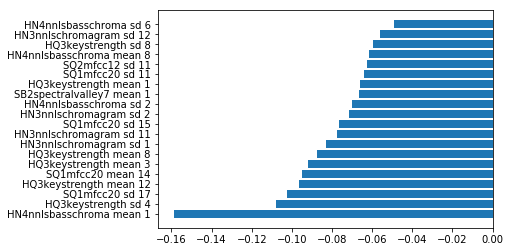

In [17]:
label_feature_importances('Warm')

Feature Importance for Feaure: Happy


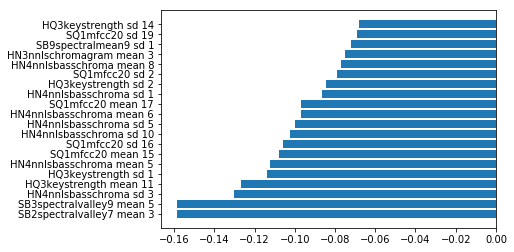

In [18]:
label_feature_importances('Happy')

Feature Importance for Feaure: Sad


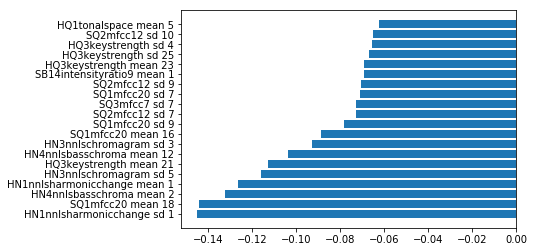

In [19]:
label_feature_importances('Sad')

In [20]:
def plot_all_feature_importances(top=20):  
    coef = model.coef_
    names = list(df.columns.difference(['mood metadata']))

    for index, classes_coef in enumerate(coef):
        class_name = le.inverse_transform(index)
        print('Feature Importance for Feaure: {}'.format(class_name))
        imp, names = zip(*sorted(zip(classes_coef, names)))
        imp = imp[:top]
        names = names[:top]        
        plt.barh(range(len(names)), imp, align='center')
        plt.yticks(range(len(names)), names)
        plt.show()
        inp = input("press 'q' to quit(just Enter to continue...)")
        if inp == 'q':
            break
            

/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importance for Feaure: Ambient


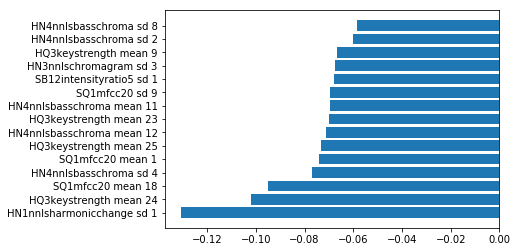

press 'q' to quit(just Enter to continue...)c
Feature Importance for Feaure: Anger


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


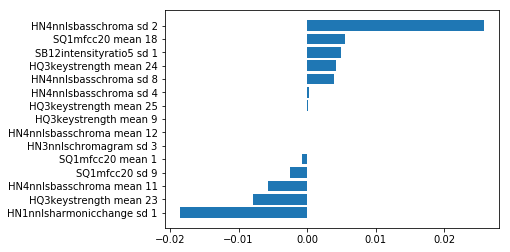

press 'q' to quit(just Enter to continue...)c


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importance for Feaure: Anthemic


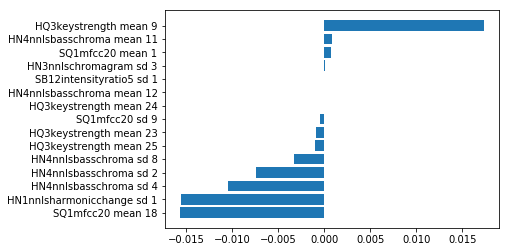

press 'q' to quit(just Enter to continue...)c


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importance for Feaure: Background


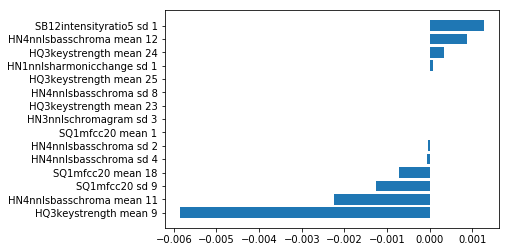

press 'q' to quit(just Enter to continue...)c


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importance for Feaure: Ballads


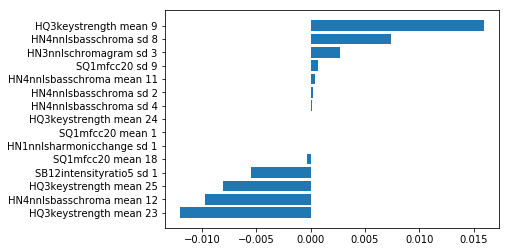

press 'q' to quit(just Enter to continue...)c
Feature Importance for Feaure: Beautiful


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


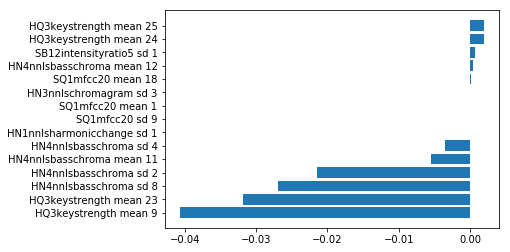

press 'q' to quit(just Enter to continue...)c


/Users/akushwaha/PycharmProjects/linear_models/.venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importance for Feaure: Beds


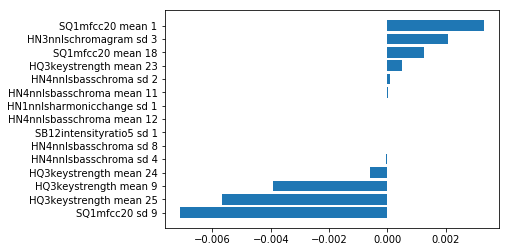

press 'q' to quit(just Enter to continue...)q


In [21]:
plot_all_feature_importances(15)